In [ ]:
# 자원순환정보시스템 api=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE

# 자원순환정보시스템 open api 조회
# http://www.recycling-info.or.kr/sds/JsonApi.do?PID={API서식번호} &YEAR={조회년도}&USRID={아이디}&KEY={API인증키}


# 자원순환정보시스템 open api 설명
# https://www.recycling-info.or.kr/statDoc/%ED%8F%90%EA%B8%B0%EB%AC%BC%ED%86%B5%EA%B3%84_OpenAPI%ED%99%9C%EC%9A%A9%EA%B0%80%EC%9D%B4%EB%93%9C.pdf

In [1]:
import requests
import pandas as pd
import json



list_df=[]
year=['2014','2015','2016','2017','2018']
for y in year:
    url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN003&YEAR="+y+"&USRID=kriem546&KEY=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE"
    response = requests.get(url)
    result=json.loads(response.text)

    data=result['data']
    df=pd.DataFrame(data)
    df['처리년도']=y
    list_df.append(df)
    
df_total=pd.concat(list_df)  

In [2]:
import requests
import pandas as pd
import json


url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN007&YEAR=2019&USRID=kriem546&KEY=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE"
response = requests.get(url)
result=json.loads(response.text)

data=result['data']
df=pd.DataFrame(data)
df['처리년도']='2019'

df.replace('\r','',inplace=True,regex=True)

In [3]:
import requests
import pandas as pd
import json


url = "http://www.recycling-info.or.kr/sds/JsonApi.do?PID=NTN007&YEAR=2020&USRID=kriem546&KEY=OIZF6LPJKYIUCWX2CEKO05O1RX1N46OX8VL95HHDO5ABE"
response = requests.get(url)
result=json.loads(response.text)

data=result['data']
df=pd.DataFrame(data)
df['처리년도']='2020'


df.replace('\r','',inplace=True,regex=True)

In [1]:
code=['W01', 'W02', 'W03', 'W04','W05','W06','W07','W08','W09','W0A','W0B','W0C','W0D','W0E','W0F','W0G','W0H','W0I','W0J','W0K','W0L','W0M',
      'W0N','W0P','W0Q','W0R','W0S','W0T','W0U','W0V','W0W','W0X','W0Y','W0Z','W10','W11','W12','W13','W14','W15','W16','W17','W18','W19',
      'W1A','W1B','W1C','W1D','W1E','W1F','W1G','W1H','W1I','W1J','W1K','W1L','W1M','W1O','W1P','W1Q','W1R','W1S','W1T','W1U','W1V','W1W',
      'W1X','W1Y','W1Z','W20','W21','W22','W23','W24','W25','W26','W27','W28','W29','W2A','W2B','W2D','W2G','W2H','W2I','W2L','W2P','W2Q',
      'W2R','W2S','W2T','W2U','W2V','W2W','W2Y','W30','W31','W32','W33','W34','W35','W36','W37','W38','W3C','W3D','W3E','W3F','W3G','W3H',
      'W3I','W3J','W3K','W3L','W3N','W3O','W3Q','W3S','W3U','W42','W44','W4C','W4H','W4N','W4O','W4Q','W4R','W4S','W4W','W4Z','W50','W51',
      'W52','W53','W54','W55','W56','W5D','W5I','W5J','W5K','W5M','W5P','W5S','W5T','W5U','W5V','W5W','W5X','W5Z','W61','W64','W67','W68',
      'W69','W6B','W6C','W6D','W6F','W6H','W6J','W6L','W6M','W6N','W6P','W6Q','W6S','W6V','W6W','W6X','W6Y','W6Z']

In [10]:
import requests
import pandas as pd
import json
import time

year=['2018','2019','2020','2021']
month=['01','02','03','04','05','06','07','08','09','10','11','12']


for y in year:
    for m in month:
        list_df=[]
        for c in code:
            try:
                url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
                param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                        'type' : 'json', 'disYear' : y, 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '100' }

                response = requests.get(url, params=param)
                result=json.loads(response.text)
            except:
                url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
                param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                        'type' : 'json', 'disYear' : y, 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '100' }
                
                time.sleep(5)
                response = requests.get(url, params=param)
                result=json.loads(response.text)

            if result['data']['resultMsg']=='성공':
                data=result['data']
                df=pd.DataFrame(result['data']['list'])
                    
                list_df.append(df)
            
        df_month=pd.concat(list_df)            
        df_month.to_csv('Food_waste_'+y+'_'+m+'.csv',encoding='cp949')

In [9]:
import requests
import pandas as pd
import json
import time

month=['01','02','03','04','05','06','07','08','09','10']

for m in month:
    list_df=[]
    for c in code:
        try:
            url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
            param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                    'type' : 'json', 'disYear' : '2022', 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '1000' }

            response = requests.get(url, params=param)
            result=json.loads(response.text)
        except:
            url = 'http://apis.data.go.kr/B552584/RfidFoodWasteServiceNew/getCityDateList'
            param ={'serviceKey' : 'PnDDFfwlwy/ruQHr8wpEN6CJoMvzkuUqorpGhCcvA6a2yajRCSoET2yx4a77oMwDWZ4RtUi1dY55HmVMDle4ig==', 
                        'type' : 'json', 'disYear' : '2022', 'disMonth' : m, 'cityCode' : c, 'page' : '1', 'rowNum' : '1000' }
                
            time.sleep(5)
            response = requests.get(url, params=param)
            result=json.loads(response.text)

        if result['data']['resultMsg']=='성공':
            data=result['data']
            df=pd.DataFrame(result['data']['list'])
                    
            list_df.append(df)
            
    df_month=pd.concat(list_df)            
    df_month.to_csv('Food_waste_2022_'+m+'.csv',encoding='cp949')

In [1]:
# 지금 오류가 발생함

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_csi_total=pd.read_csv('./CSI/CSI.csv',encoding='cp949',index_col=0)
df_csi_total=df_csi_total.astype(str)
# import requests
# import json

# # 서울을 뺀 나머지 지역
# url = "https://ecos.bok.or.kr/api/StatisticSearch/T8A84YWKZS0PNL81QUGV/json/kr/1/99999/511Y004/M/201501/202210/FMCA"
# response = requests.get(url)
# result=json.loads(response.text)

# df=pd.DataFrame(result['StatisticSearch']['row'])
# df.dropna(axis=1,inplace=True)
# df['ID']=df['TIME']+df['ITEM_NAME2']

# url = "https://ecos.bok.or.kr/api/StatisticSearch/T8A84YWKZS0PNL81QUGV/json/kr/1/99999/511Y004/M/201801/202210/FMCB"
# response = requests.get(url)

# result=json.loads(response.text)
# df1=pd.DataFrame(result['StatisticSearch']['row'])

# df1.dropna(axis=1,inplace=True)
# df1['ID']=df1['TIME']+df1['ITEM_NAME2']
# df1.drop(['STAT_CODE','STAT_NAME','ITEM_CODE2','ITEM_NAME2','TIME'],axis=1,inplace=True)
# df1.columns=['ITEM_CODE3','ITEM_NAME3','DATA_VALUE2','ID']
# df_csi=pd.merge(df,df1,how='left',on='ID')

# # 지역 서울
# url = "https://ecos.bok.or.kr/api/StatisticSearch/T8A84YWKZS0PNL81QUGV/json/kr/1/99999/511Y002/M/201801/202210/FMCA/F0001"
# response = requests.get(url)
# result=json.loads(response.text)

# df=pd.DataFrame(result['StatisticSearch']['row'])
# df.dropna(axis=1,inplace=True)
# df['ID']=df['TIME']+df['ITEM_NAME2']

# url = "https://ecos.bok.or.kr/api/StatisticSearch/T8A84YWKZS0PNL81QUGV/json/kr/1/99999/511Y002/M/201801/202210/FMCB/F0001"
# response = requests.get(url)
# response = requests.get(url)

# result=json.loads(response.text)
# df1=pd.DataFrame(result['StatisticSearch']['row'])

# df1.dropna(axis=1,inplace=True)
# df1['ID']=df1['TIME']+df1['ITEM_NAME2']
# df1.drop(['STAT_CODE','STAT_NAME','ITEM_CODE2','ITEM_NAME2','TIME'],axis=1,inplace=True)
# df1.columns=['ITEM_CODE3','ITEM_NAME3','DATA_VALUE2','ID']

# df_csi_seoul=pd.merge(df,df1,how='left',on='ID')
# df_csi_total=pd.concat([df_csi, df_csi_seoul])

# df_csi_total.drop(['STAT_CODE','STAT_NAME','ITEM_NAME1','ITEM_CODE1','ITEM_CODE2','ITEM_NAME3','ITEM_CODE3','ID'],axis=1,inplace=True)

# df_csi_total=df_csi_total[['TIME','ITEM_NAME2','DATA_VALUE','DATA_VALUE2']]
# df_csi_total.columns=['TIME','AREA','가계수입전망CSI','소비지출전망CSI']

df1=df_csi_total[df_csi_total['AREA']=='대구경북']
df2=df_csi_total[df_csi_total['AREA']=='광주전남']
df3=df_csi_total[df_csi_total['AREA']=='대전세종충남']

area={'AREA':{'부산':'부산광역시','대구경북':'경상북도','인천':'인천광역시','광주전남':'전라남도','대전세종충남':'충청남도',
              '울산':'울산광역시','경기':'경기도','강원':'강원도','충북':'충청북도','전북':'전라북도','경남':'경상남도',
              '제주':'제주특별자치도','서울':'서울특별시'}}

df_csi_total.replace(area,inplace=True)
df1.replace({'대구경북':'대구광역시'},inplace=True)
df2.replace({'광주전남':'광주광역시'},inplace=True)
df3.replace({'대전세종충남':'대전광역시'},inplace=True)
df_csi_total=pd.concat([df_csi_total,df1,df2,df3])

df_csi_total.reset_index(inplace=True)
df_csi_total.drop('index',axis=1,inplace=True)
df_csi_total['ID']=df_csi_total['TIME']+df_csi_total['AREA']

df_csi_total.rename(columns={'Household_Income_Outlook_CSI':'가계수입전망CSI','Consumer_Spending_Outlook_CSI':'소비지출전망CSI'},inplace=True)

In [2]:
p_url=['https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=11110+11140+11170+11200+11215+11230+11260+11290+11305+11320+11350+11380+11410+11440+11470+11500+11530+11545+11560+11590+11620+11650+11680+11710+11740+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=26110+26140+26170+26200+26230+26260+26290+26320+26350+26380+26410+26440+26470+26500+26530+26710+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=27110+27140+27170+27200+27230+27260+27290+27710+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=28110+28114+28118+28140+28170+28177+28185+28200+28237+28245+28260+28265+28710+28720+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=29110+29140+29155+29170+29200+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=30110+30140+30170+30200+30230+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=31110+31140+31170+31200+31710+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=41105+41110+41111+41113+41115+41117+41130+41131+41133+41135+41150+41170+41171+41173+41190+41195+41197+41199+41210+41220+41222+41224+41250+41270+41271+41273+41280+41281+41285+41287+41290+41310+41360+41362+41370+41390+41410+41430+41450+41460+41461+41463+41465+41480+41500+41550+41570+41590+41592+41594+41610+41630+41650+41670+41730+41800+41820+41830+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=42105+42110+42130+42150+42170+42190+42210+42230+42720+42730+42750+42760+42770+42780+42790+42800+42810+42820+42830+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=43110+43111+43112+43113+43114+43130+43150+43710+43720+43730+43740+43745+43750+43760+43770+43800+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=44130+44131+44133+44150+44180+44200+44210+44230+44250+44270+44710+44730+44760+44770+44790+44800+44810+44825+44830+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=45110+45111+45113+45118+45130+45140+45145+45180+45190+45210+45710+45720+45730+45740+45750+45770+45790+45800+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=46110+46130+46150+46170+46230+46710+46720+46730+46770+46780+46790+46800+46810+46820+46830+46840+46860+46870+46880+46890+46900+46910+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=47110+47111+47113+47130+47150+47170+47190+47210+47230+47250+47280+47290+47720+47730+47750+47760+47770+47820+47830+47840+47850+47900+47920+47930+47940+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=48110+48120+48121+48123+48125+48127+48129+48160+48170+48190+48220+48240+48245+48250+48252+48270+48310+48330+48332+48720+48730+48740+48820+48840+48850+48860+48870+48880+48890+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006',
     'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey=MTc0MDVmNDdhNTYyOWQ1MWU0NTYzYmNhOWQ3ODEyMGQ=&itmId=T2+T3+T4+&objL1=50110+50130+&objL2=000+&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=M&startPrdDe=201801&endPrdDe=202210&orgId=101&tblId=DT_1B04006']

name=['seoul','busan','daegu','incheon','gwangju','daejeon','ulsan','gyeonggi','gangwon','chungcheongbukdo','chungcheongnamdo','jeollabukdo','jeollanamdo','gyeongsangbukdo','gyeongsangnamdo','jeju']

In [3]:
import requests
import json
import pandas as pd

for u,n in zip(p_url,name):
    url = u
    response = requests.get(url)
    result=json.loads(response.text)

    df=pd.DataFrame(result)

    df.drop(['TBL_NM','TBL_ID','ITM_NM_ENG','ITM_ID','UNIT_NM','ORG_ID','UNIT_NM_ENG','C1_OBJ_NM','C1_OBJ_NM_ENG','C2_OBJ_NM','PRD_SE','C2','C1','C2_NM','C1_NM_ENG'],axis=1,inplace=True)
    
    if n=='gyeongsangnamdo':
        df=df.replace({'C1_NM':{'창원시(통합)':'창원시'}})
    df['ID']=df['PRD_DE']+df['C1_NM']

    df1=df[df['ITM_NM']=='총인구수']
    df2=df[df['ITM_NM']=='남자인구수']
    df3=df[df['ITM_NM']=='여자인구수']

    df1.drop(['ITM_NM','C1_NM'],axis=1,inplace=True)
    df2.drop(['PRD_DE','ITM_NM','C1_NM'],axis=1,inplace=True)
    df3.drop(['PRD_DE','ITM_NM','C1_NM'],axis=1,inplace=True)

    df1.columns=['PRD_DE','총인구수','ID']
    df2.columns=['남자인구수','ID']
    df3.columns=['여자인구수','ID']

    dfa=pd.merge(df1,df2,how='left',on='ID')
    globals()['df_'+n+'_p']=pd.merge(dfa,df3,how='left',on='ID')

In [4]:
import os
import numpy as np

path='./Food_waste'
file_list=os.listdir(path)

list_df=[]
for f in file_list:
    df=pd.read_csv('./Food_waste/'+f,encoding='cp949')
    list_df.append(df)
    
df_total=pd.concat(list_df)
df_total=df_total.astype(str)

df_total['disMonth']=df_total['disMonth'].str.zfill(2)
df_total['disDate']=df_total['disDate'].str.zfill(2)

df_total.drop('Unnamed: 0',axis=1,inplace=True)
df_total['ID']=df_total['disYear']+df_total['disMonth']+df_total['citySidoName']

df_m=pd.merge(df_total,df_csi_total,how='left',on='ID')
df_m.drop(['TIME','AREA','ID'],axis=1,inplace=True)
df_m['disQuantity']=df_m['disQuantity'].astype(float)
# df_m['disDay']=df_m['disDay'].astype(int)

list_disDay=[]
for i in df_m['disDay']:
    if i=='1':
        list_disDay.append('일')
    elif i=='2':
        list_disDay.append('월')
    elif i=='3':
        list_disDay.append('화')
    elif i=='4':
        list_disDay.append('수')
    elif i=='5':
        list_disDay.append('목')
    elif i=='6':
        list_disDay.append('금')
    elif i=='7':
        list_disDay.append('토')
df_m['disDay']=list_disDay
df_m['sin_Month']=np.sin(2 * np.pi * df_m['disMonth'].astype(int)/12)
df_m=df_m.replace({'citySggName' : {'수원시장안구':'장안구', '수원시권선구':'권선구', '수원시팔달구':'팔달구', '수원시영통구':'영통구', '성남시중원구':'중원구', '성남시분당구':'분당구','성남시수정구':'수정구'}})

df_m['ID']=df_m['disYear']+df_m['disMonth']+df_m['citySggName']

In [ ]:
# def Base36(code):
    
#     Base36_code='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
#     length=len(code)
    
#     Base10=0
    
#     for i in range(length): 
#         num = 0
#         for b in Base36_code:
#             if b==code[i].upper():
#                 Base10 += (num*(36**(length-i-1)))
#             num +=1
#     return Base10

In [ ]:
# df_m['target']=df_m['disQuantity']
# dfs=df_m.drop(['citySidoName','citySggName','disQuantity'],axis=1)

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

# df_scaled=dfs.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
# scaler.fit(df_scaled)
# df_scaled=scaler.transform(df_scaled)

# #스케일링 변환된 값을 데이터프레임에 반영
# df.iloc[:, :-1]=df_scaled[:, :]
# df

In [ ]:
# df_m.drop('disQuantity',axis=1,inplace=True)

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.displot(x='disQuantity',kind='hist',data=dfm)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for df in df_area:
#     sns.displot(x='disQuantity',kind='hist',data=df)
#     plt.show()

In [91]:
df_seoul=df_m[df_m['citySidoName']=='서울특별시']
df_incheon=df_m[df_m['citySidoName']=='인천광역시']
df_busan=df_m[df_m['citySidoName']=='부산광역시']
df_ulsan=df_m[df_m['citySidoName']=='울산광역시']
df_daegu=df_m[df_m['citySidoName']=='대구광역시']
df_daejeon=df_m[df_m['citySidoName']=='대전광역시']
df_gyeonggi=df_m[df_m['citySidoName']=='경기도']
df_gyeongsangnamdo=df_m[df_m['citySidoName']=='경상남도']
df_gyeongsangbukdo=df_m[df_m['citySidoName']=='경상북도']
df_gangwon=df_m[df_m['citySidoName']=='강원도']
df_chungcheongbukdo=df_m[df_m['citySidoName']=='충청북도']
df_chungcheongnamdo=df_m[df_m['citySidoName']=='충청남도']
df_jeollabukdo=df_m[df_m['citySidoName']=='전라북도']
df_jeollanamdo=df_m[df_m['citySidoName']=='전라남도']
df_gwangju=df_m[df_m['citySidoName']=='광주광역시']
df_jeju=df_m[df_m['citySidoName']=='제주특별자치도']

In [106]:
df_area=[df_seoul,df_busan,df_daegu,df_incheon,df_gwangju,df_daejeon,df_ulsan,df_gyeonggi,df_gangwon,
         df_chungcheongbukdo,df_chungcheongnamdo,df_jeollabukdo,df_jeollanamdo,df_gyeongsangbukdo,df_gyeongsangnamdo,df_jeju]
df_p=[df_seoul_p,df_busan_p,df_daegu_p,df_incheon_p,df_gwangju_p,df_daejeon_p,df_ulsan_p,df_gyeonggi_p,df_gangwon_p,
      df_chungcheongbukdo_p,df_chungcheongnamdo_p,df_jeollabukdo_p,df_jeollanamdo_p,df_gyeongsangbukdo_p,df_gyeongsangnamdo_p,df_jeju_p]


In [132]:
for df,n,dfp in zip(df_area,name,df_p):
    dfa=pd.merge(df,dfp,how='left',on='ID')
    globals()['df_'+n+'_total']=dfa.drop(['PRD_DE','ID'],axis=1)

In [133]:
df_area_total=[df_seoul_total,
df_busan_total,
df_daegu_total,
df_incheon_total,
df_gwangju_total,
df_daejeon_total,
df_ulsan_total,
df_gyeonggi_total,
df_gangwon_total,
df_chungcheongbukdo_total,
df_chungcheongnamdo_total,
df_jeollabukdo_total,
df_jeollanamdo_total,
df_gyeongsangbukdo_total,
df_gyeongsangnamdo_total,
df_jeju_total]

In [134]:
for df in df_area_total:
    df.dropna(inplace=True)

In [135]:
df_seoul_outlier=df_seoul_total[(df_seoul_total['citySggName']=='송파구')|(df_seoul_total['citySggName']=='노원구')|(df_seoul_total['citySggName']=='도봉구')|(df_seoul_total['citySggName']=='마포구')|(df_seoul_total['citySggName']=='영등포구')|(df_seoul_total['citySggName']=='강동구')]
df_busan_outlier=df_busan_total[df_busan_total['citySggName']=='해운대구']
df_daegu_outlier=df_daegu_total[df_daegu_total['citySggName']=='달서구']
df_incheon_outlier=df_incheon_total[df_incheon_total['citySggName']=='']
df_gwangju_outlier=df_gwangju_total[df_gwangju_total['citySggName']=='']
df_daejeon_outlier=df_daejeon_total[(df_daejeon_total['citySggName']=='서구')|(df_daejeon_total['citySggName']=='중구')|(df_daejeon_total['citySggName']=='대덕구')]
df_ulsan_outlier=df_ulsan_total[df_ulsan_total['citySggName']=='']
df_gyeonggi_outlier=df_gyeonggi_total[(df_gyeonggi_total['citySggName']=='용인시')|(df_gyeonggi_total['citySggName']=='화성시')|(df_gyeonggi_total['citySggName']=='영통구')|(df_gyeonggi_total['citySggName']=='하남시')|(df_gyeonggi_total['citySggName']=='권선구')|(df_gyeonggi_total['citySggName']=='의왕시')|(df_gyeonggi_total['citySggName']=='남양주시')|(df_gyeonggi_total['citySggName']=='구리시')]
df_gangwon_outlier=df_gangwon_total[(df_gangwon_total['citySggName']=='원주시')|(df_gangwon_total['citySggName']=='동해시')|(df_gangwon_total['citySggName']=='춘천시')|(df_gangwon_total['citySggName']=='강릉시')]
df_chungcheongbukdo_outlier=df_chungcheongbukdo_total[df_chungcheongbukdo_total['citySggName']=='']
df_chungcheongnamdo_outlier=df_chungcheongnamdo_total[df_chungcheongnamdo_total['citySggName']=='서산시']
df_jeollabukdo_outlier=df_jeollabukdo_total[df_jeollabukdo_total['citySggName']=='익산시']
df_jeollanamdo_outlier=df_jeollanamdo_total[(df_jeollanamdo_total['citySggName']=='순천시')|(df_jeollanamdo_total['citySggName']=='여수시')|(df_jeollanamdo_total['citySggName']=='나주시')|(df_jeollanamdo_total['citySggName']=='무안군')|(df_jeollanamdo_total['citySggName']=='목포시')|(df_jeollanamdo_total['citySggName']=='화순군')]
df_gyeongsangbukdo_outlier=df_gyeongsangbukdo_total[(df_gyeongsangbukdo_total['citySggName']=='구미시')|(df_gyeongsangbukdo_total['citySggName']=='포항시')|(df_gyeongsangbukdo_total['citySggName']=='경산시')|(df_gyeongsangbukdo_total['citySggName']=='안동시')|(df_gyeongsangbukdo_total['citySggName']=='김천시')|(df_gyeongsangbukdo_total['citySggName']=='영주시')]
df_gyeongsangnamdo_outlier=df_gyeongsangnamdo_total[(df_gyeongsangnamdo_total['citySggName']=='김해시')|(df_gyeongsangnamdo_total['citySggName']=='진주시')|(df_gyeongsangnamdo_total['citySggName']=='양산시')]
df_jeju_outlier=df_jeju_total[df_jeju_total['citySggName']=='']

In [137]:
seoul_idx=df_seoul_outlier.index
busan_idx=df_busan_outlier.index
daegu_idx=df_daegu_outlier.index
incheon_idx=df_incheon_outlier.index
gwangju_idx=df_gwangju_outlier.index
daejeon_idx=df_daejeon_outlier.index
ulsan_idx=df_ulsan_outlier.index
gyeonggi_idx=df_gyeonggi_outlier.index
gangwon_idx=df_gangwon_outlier.index
chungcheongbukdo_idx=df_chungcheongbukdo_outlier.index
chungcheongnamdo_idx=df_chungcheongnamdo_outlier.index
jeollabukdo_idx=df_jeollabukdo_outlier.index
jeollanamdo_idx=df_jeollanamdo_outlier.index
gyeongsangbukdo_idx=df_gyeongsangbukdo_outlier.index
gyeongsangnamdo_idx=df_gyeongsangnamdo_outlier.index
jeju_idx=df_jeju_outlier.index

df_seoul_total.drop(seoul_idx, inplace=True)
df_busan_total.drop(busan_idx, inplace=True)
df_daegu_total.drop(daegu_idx, inplace=True)
df_incheon_total.drop(incheon_idx, inplace=True)
df_gwangju_total.drop(gwangju_idx, inplace=True)
df_daejeon_total.drop(daejeon_idx, inplace=True)
df_ulsan_total.drop(ulsan_idx, inplace=True)
df_gyeonggi_total.drop(gyeonggi_idx, inplace=True)
df_gangwon_total.drop(gangwon_idx, inplace=True)
df_chungcheongbukdo_total.drop(chungcheongbukdo_idx, inplace=True)
df_chungcheongnamdo_total.drop(chungcheongnamdo_idx, inplace=True)
df_jeollabukdo_total.drop(jeollabukdo_idx, inplace=True)
df_jeollanamdo_total.drop(jeollanamdo_idx, inplace=True)
df_gyeongsangbukdo_total.drop(gyeongsangbukdo_idx, inplace=True)
df_gyeongsangnamdo_total.drop(gyeongsangnamdo_idx, inplace=True)
df_jeju_total.drop(jeju_idx, inplace=True)

In [138]:
def outlier(df):
    quantity = df['disQuantity']

    if quantity > q3 + 1.5 * iqr or quantity < q1 - 1.5 * iqr:
        return True
    else:
        return False

In [145]:
for df in df_area_total:
    
    q3=df['disQuantity'].quantile(0.75)
    q1=df['disQuantity'].quantile(0.25)
    iqr=q3-q1
    
    
    df['이상치여부']=df.apply(outlier, axis = 1)
    
    print(df[df['이상치여부']==True]['citySggName'].value_counts())
    print('-----------------')

Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------
Series([], Name: citySggName, dtype: int64)
-----------------


In [144]:
for df in df_area_total:
    idx=df[df['이상치여부']==True].index
    df.drop(idx,inplace=True)
# 이상치가 다 사라질때까지 반복

In [146]:
for df in df_area_total:
    print(len(df))

32949
26443
12345
15687
8823
3518
8411
35418
13424
2987
1563
11679
2239
10708
11939
3530


In [160]:
df_area_outlier=[df_seoul_outlier,
df_busan_outlier,
df_daegu_outlier,
df_incheon_outlier,
df_gwangju_outlier,
df_daejeon_outlier,
df_ulsan_outlier,
df_gyeonggi_outlier,
df_gangwon_outlier,
df_chungcheongbukdo_outlier,
df_chungcheongnamdo_outlier,
df_jeollabukdo_outlier,
df_jeollanamdo_outlier,
df_gyeongsangbukdo_outlier,
df_gyeongsangnamdo_outlier,
df_jeju_outlier]

In [161]:
df_outlier=pd.concat(df_area_outlier)

In [163]:
df_two_outlier=df_outlier[(df_outlier['citySggName']=='용인시')|(df_outlier['citySggName']=='익산시')|(df_outlier['citySggName']=='화성시')]

In [164]:
outlier_idx=df_two_outlier.index
df_outlier.drop(outlier_idx, inplace=True)

In [170]:
q3=df_outlier['disQuantity'].quantile(0.75)
q1=df_outlier['disQuantity'].quantile(0.25)
iqr=q3-q1
    
    
df_outlier['이상치여부']=df_outlier.apply(outlier, axis = 1)
    
print(df_outlier[df_outlier['이상치여부']==True]['citySggName'].value_counts())
print('-----------------')

Series([], Name: citySggName, dtype: int64)
-----------------


In [169]:
# 다 사라질때까지 반복
idx=df_outlier[df_outlier['이상치여부']==True].index
df_outlier.drop(idx,inplace=True)

In [181]:
q3=df_two_outlier['disQuantity'].quantile(0.75)
q1=df_two_outlier['disQuantity'].quantile(0.25)
iqr=q3-q1
    
    
df_two_outlier['이상치여부']=df_two_outlier.apply(outlier, axis = 1)
    
print(df_two_outlier[df_two_outlier['이상치여부']==True]['citySggName'].value_counts())
print('-----------------')

Series([], Name: citySggName, dtype: int64)
-----------------


In [182]:
# 다 사라질때까지 반복
idx=df_two_outlier[df_two_outlier['이상치여부']==True].index
df_two_outlier.drop(idx,inplace=True)

In [29]:
# df_seoul_total.drop(9016,inplace=True)
# df_gyeonggi_total.drop(31134,inplace=True)

disQuantity     sin_Month
count  3.296300e+04  3.296300e+04
mean   1.062562e+07 -4.886536e-03
std    5.907545e+06  7.147340e-01
min    4.000000e+02 -1.000000e+00
25%    5.955250e+06 -8.660254e-01
50%    1.057805e+07  1.224647e-16
75%    1.514538e+07  5.000000e-01
max    4.156875e+07  1.000000e+00

In [ ]:
df_area_total=[df_seoul_total,
df_busan_total,
df_daegu_total,
df_incheon_total,
df_gwangju_total,
df_daejeon_total,
df_ulsan_total,
df_gyeonggi_total,
df_gangwon_total,
df_chungcheongbukdo_total,
df_chungcheongnamdo_total,
df_jeollabukdo_total,
df_jeollanamdo_total,
df_gyeongsangbukdo_total,
df_gyeongsangnamdo_total,
df_jeju_total]

In [38]:
df_gyeonggi_total.describe()

disQuantity     sin_Month
count  4.254100e+04  4.254100e+04
mean   1.351924e+07 -6.034268e-04
std    1.151497e+07  7.149790e-01
min    5.000000e+01 -1.000000e+00
25%    4.552750e+06 -8.660254e-01
50%    1.028370e+07  1.224647e-16
75%    2.210355e+07  8.660254e-01
max    9.875785e+07  1.000000e+00

In [36]:
df_gyeonggi_total['disQuantity'].idxmax(axis=0)

31134

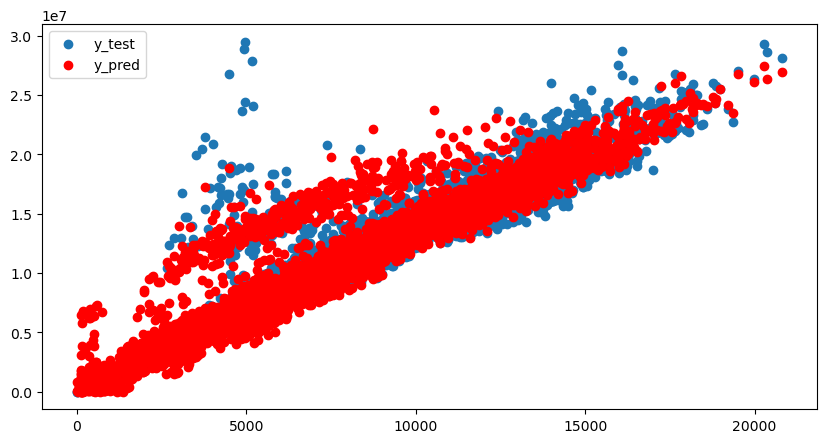

0.9300215697662921


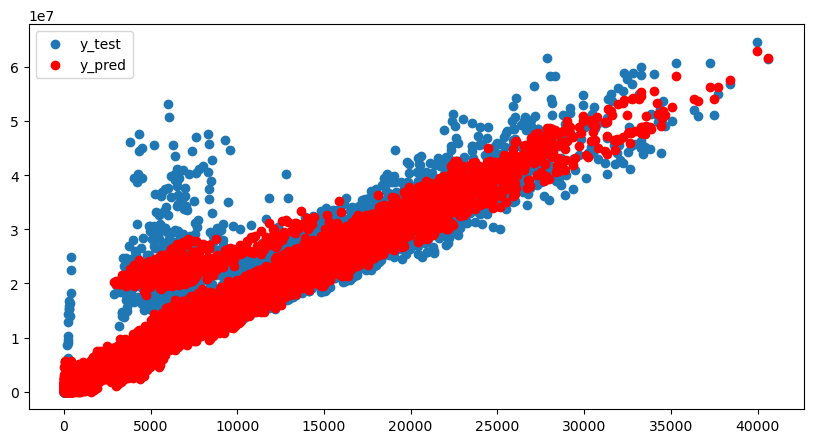

0.9582892871816985


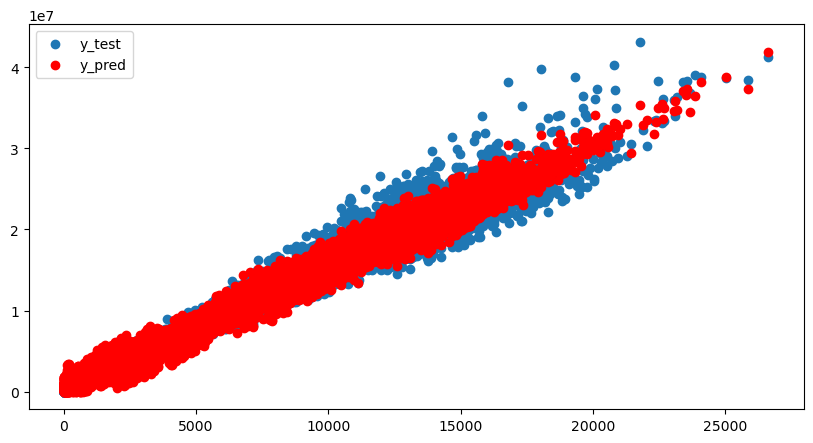

0.9871788815386209


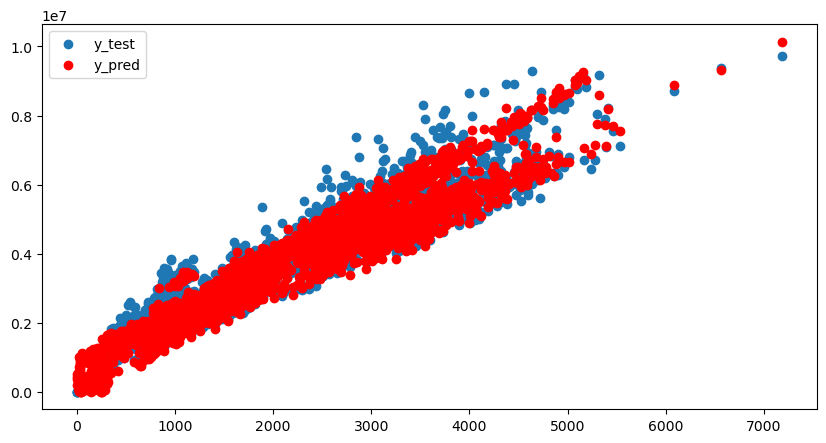

0.977055759057604


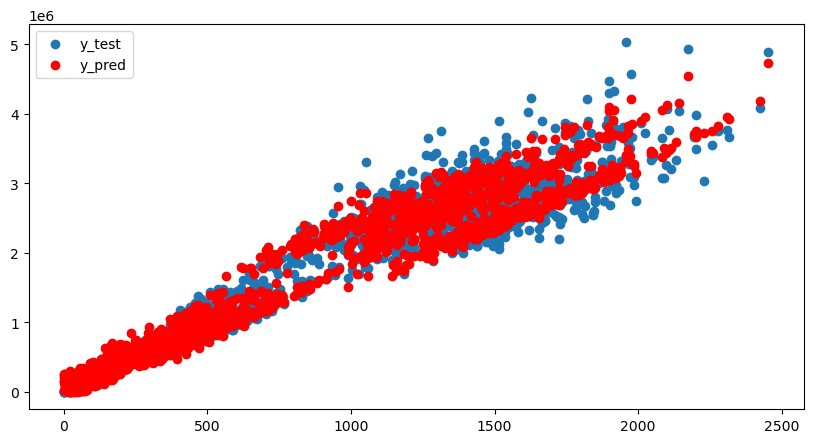

0.9852004972497913


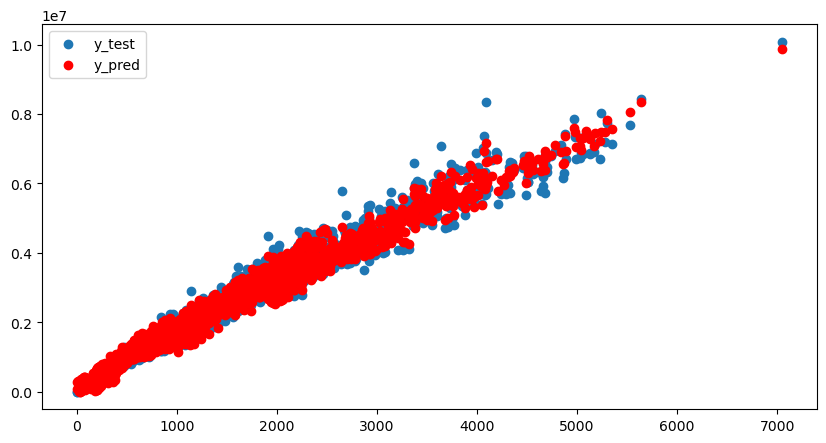

0.9908697523927965


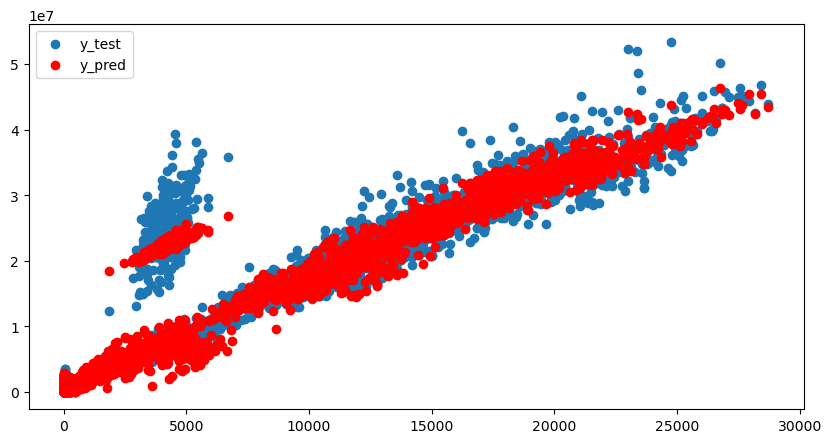

0.9729324518111452


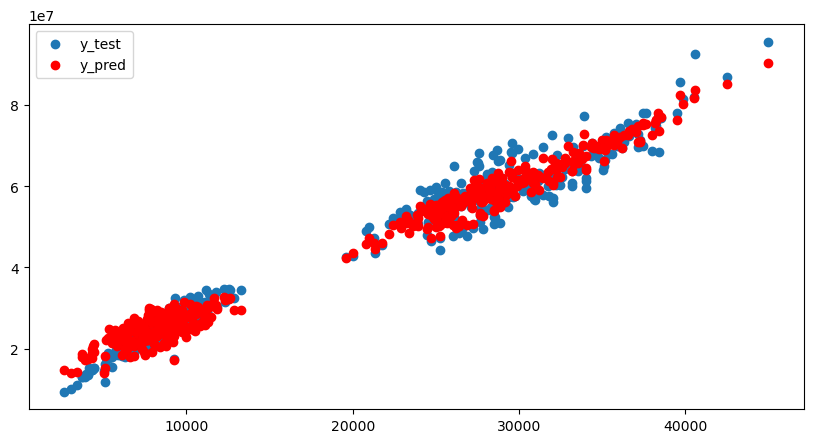

0.982451104403557


In [35]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for df in df_area_total:
    df_t=df.drop(['이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'disQuantityRate':'float','disCount':'int','disCountRate':'float','가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop(['target','disQuantityRate','disCountRate'],axis=1)
    y_data=df_test['target']

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, shuffle=True)
    #선형 회귀 모형
    lr=LinearRegression()
    lr.fit(x_train, y_train)

    #예측값 저장
    y_pred=lr.predict(x_test)

    y_pred=np.where(y_pred<0, y_pred*(-1), y_pred)

    #예측값과 실제값의 분포
    plt.figure(figsize=(10, 5)) #표 크기 지정
    plt.scatter(x_test['disCount'], y_test, label='y_test')  #파란점, 실제값
    plt.scatter(x_test['disCount'], y_pred, c='r', label='y_pred')  #빨간점, 예측값
    plt.legend(loc='best')  #범례(오른쪽 상단 박스)가 표시되는 위치 지정
    plt.show()
    
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

In [63]:
df_seoul_total.dtypes

disYear                           object
disMonth                          object
disDate                           object
disDay                            object
cityCode                          object
citySidoName                      object
citySggName                       object
disQuantity                      float64
disQuantityRate                   object
disCount                          object
disCountRate                      object
Household_Income_Outlook_CSI      object
Consumer_Spending_Outlook_CSI     object
sin_Month                        float64
총인구수                              object
남자인구수                             object
여자인구수                             object
이상치여부                               bool
dtype: object

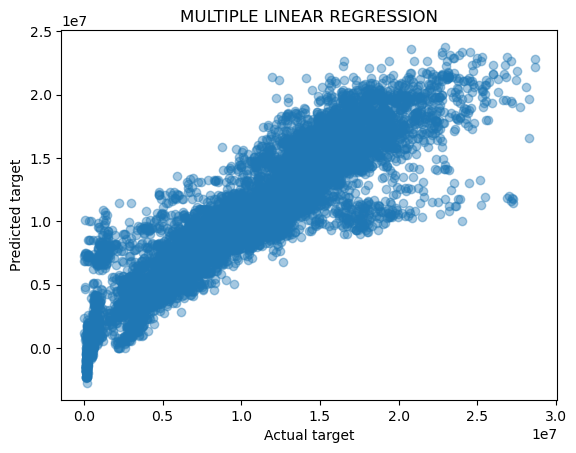

훈련 세트 점수 : 0.81
테스트 세트 점수 : 0.81
사용한 특성의 개수 :  37
0.8112717096080337


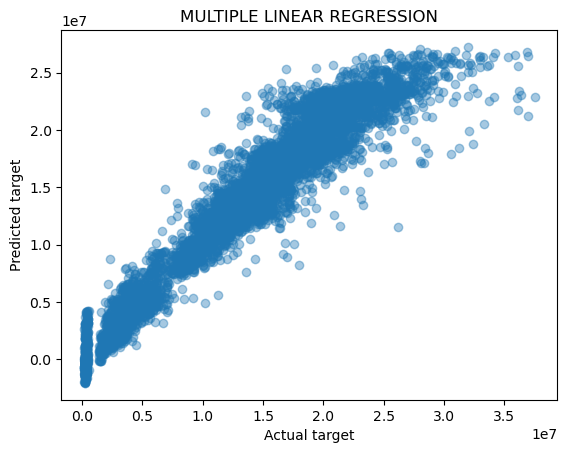

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.93
사용한 특성의 개수 :  33
0.9271990843184326


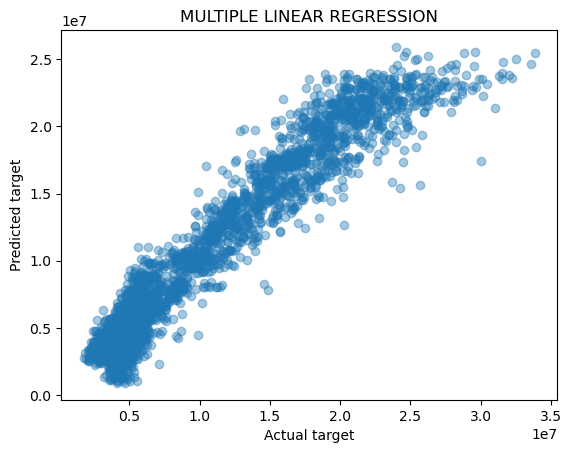

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.93
사용한 특성의 개수 :  25
0.9262850753160707


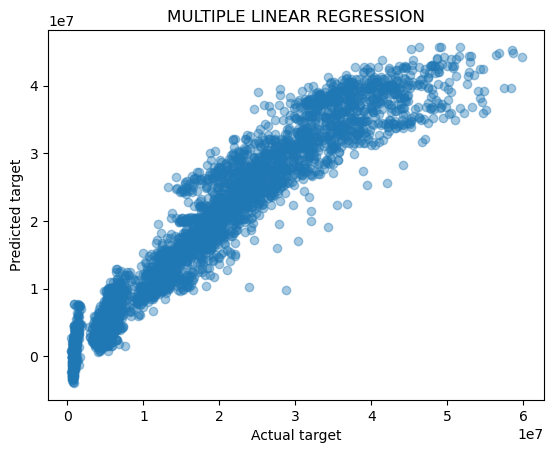

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.93
사용한 특성의 개수 :  27
0.9266999395064561


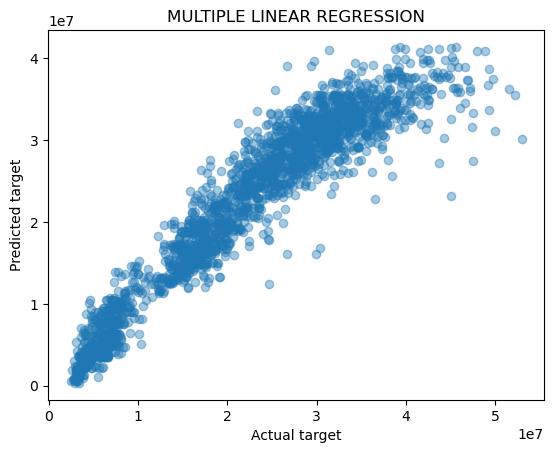

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.90
사용한 특성의 개수 :  23
0.9026778163957289


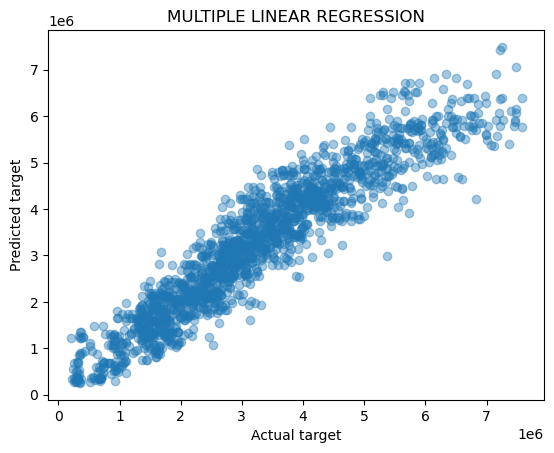

훈련 세트 점수 : 0.88
테스트 세트 점수 : 0.88
사용한 특성의 개수 :  22
0.8778793730599801


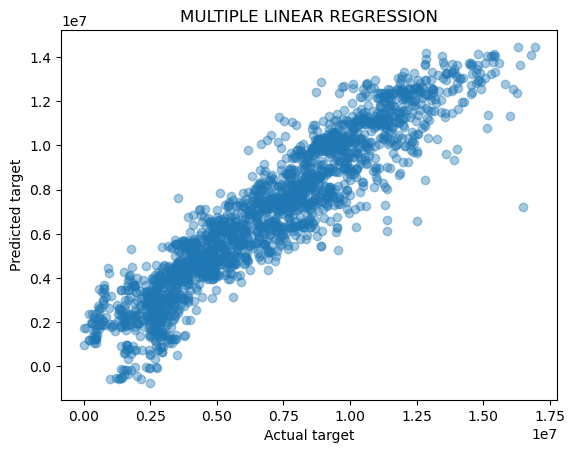

훈련 세트 점수 : 0.87
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  23
0.8697962708326742


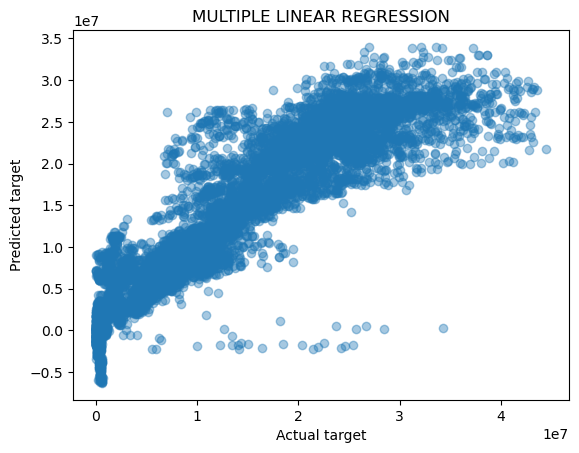

훈련 세트 점수 : 0.85
테스트 세트 점수 : 0.85
사용한 특성의 개수 :  45
0.8498727893571917


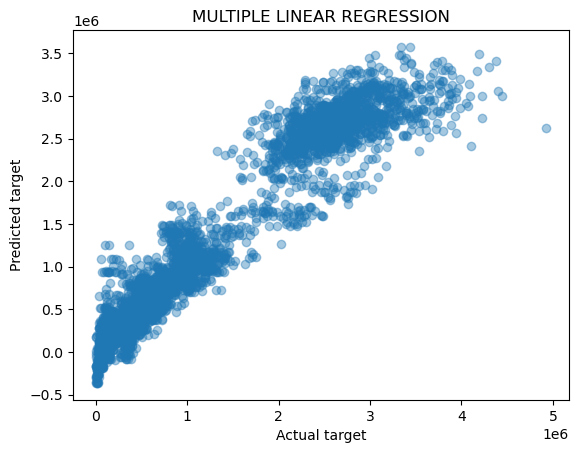

훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.92
사용한 특성의 개수 :  28
0.9170807254996587


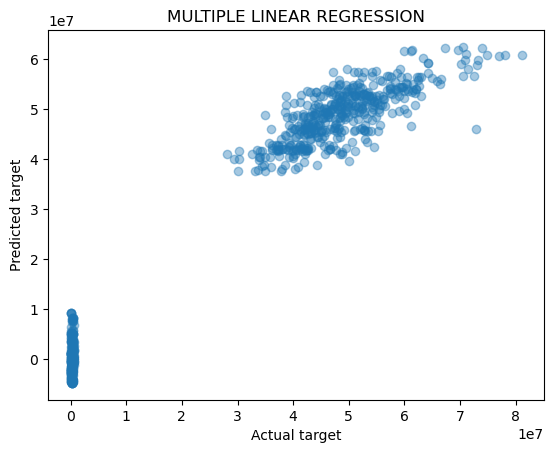

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.96
사용한 특성의 개수 :  21
0.9610325075032471


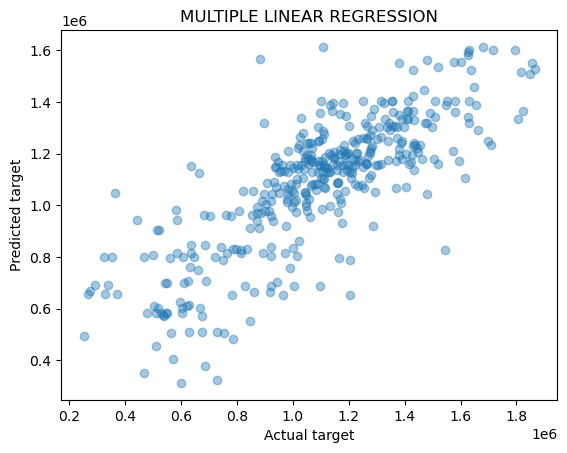

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.64
사용한 특성의 개수 :  18
0.6374104306066224


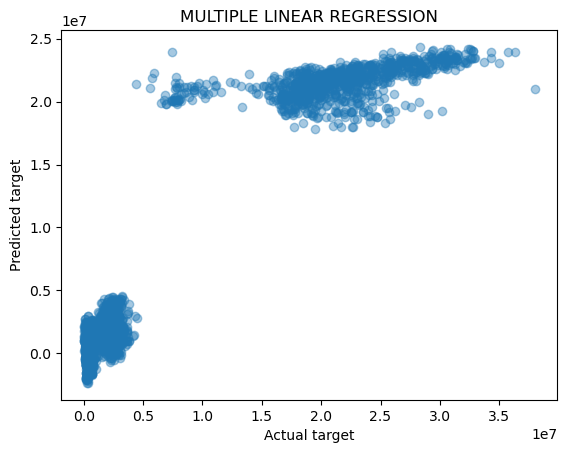

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.91
사용한 특성의 개수 :  26
0.9139418629164436


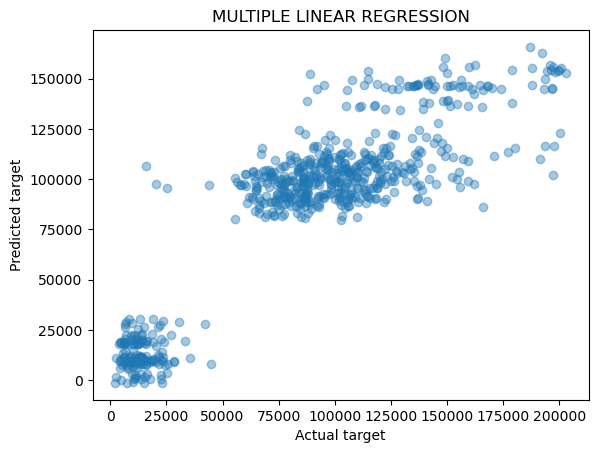

훈련 세트 점수 : 0.76
테스트 세트 점수 : 0.78
사용한 특성의 개수 :  22
0.7841925254463393


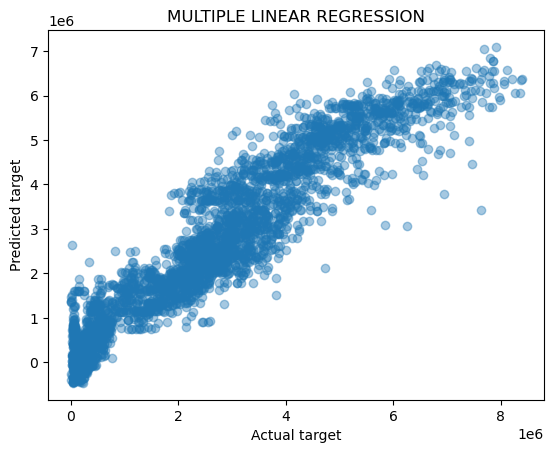

훈련 세트 점수 : 0.88
테스트 세트 점수 : 0.88
사용한 특성의 개수 :  28
0.8834140612004849


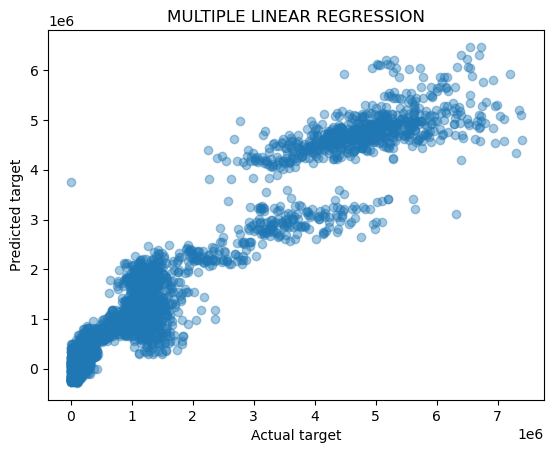

훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.92
사용한 특성의 개수 :  27
0.9212647037475782


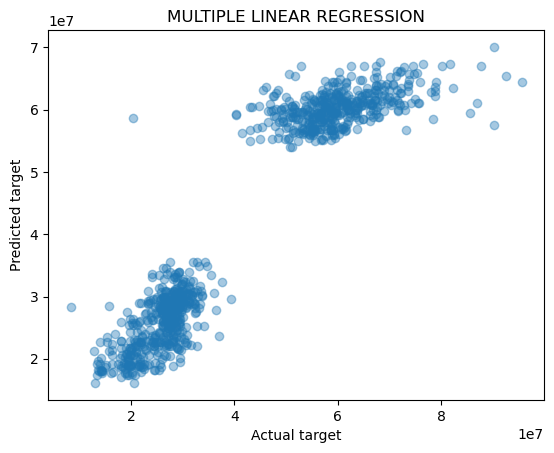

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.89
사용한 특성의 개수 :  20
0.8930240397893673


In [75]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for df in df_area_total:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int','총인구수':'int','남자인구수':'int','여자인구수':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

    mlr = LinearRegression()
    mlr.fit(x_train, y_train) 

    y_pred = mlr.predict(x_test)

    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("MULTIPLE LINEAR REGRESSION")
    plt.show()

    print('훈련 세트 점수 : {:.2f}'.format(mlr.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(mlr.score(x_test, y_test)))
    print('사용한 특성의 개수 : ', np.sum(mlr.coef_ != 0))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

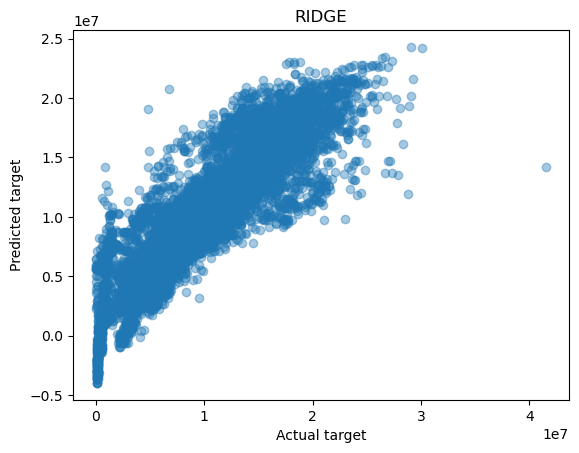

훈련 세트 점수 : 0.10
테스트 세트 점수 : 0.78
사용한 특성의 개수 :  266
0.7849402753242068


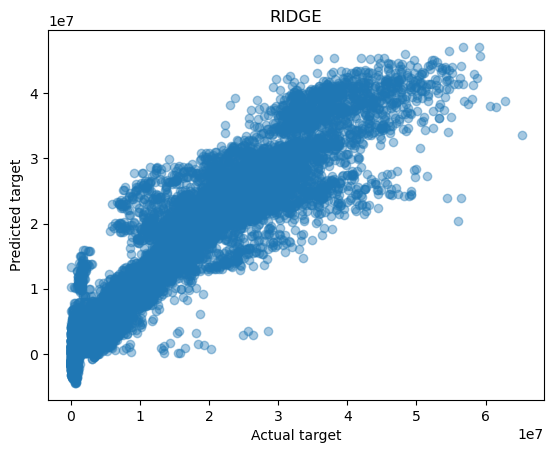

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.88
사용한 특성의 개수 :  458
0.8802251982582463


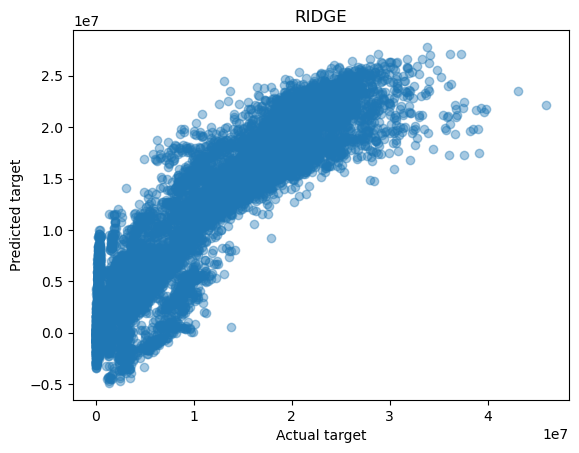

훈련 세트 점수 : 0.85
테스트 세트 점수 : 0.85
사용한 특성의 개수 :  622
0.8493490761551072


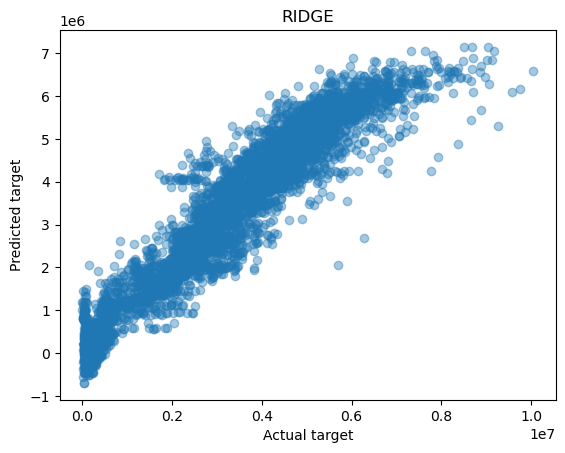

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.90
사용한 특성의 개수 :  434
0.8971323520788994


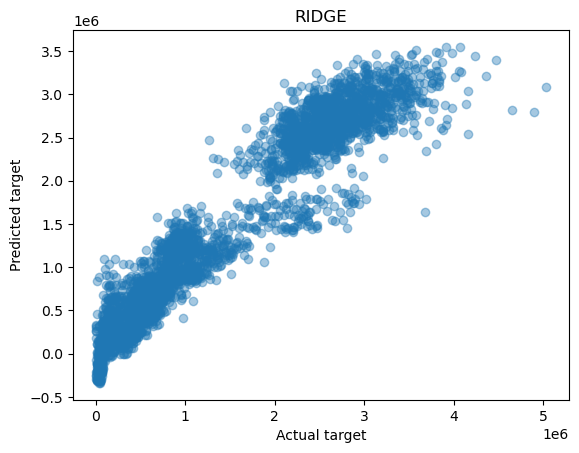

훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.92
사용한 특성의 개수 :  257
0.918077105492358


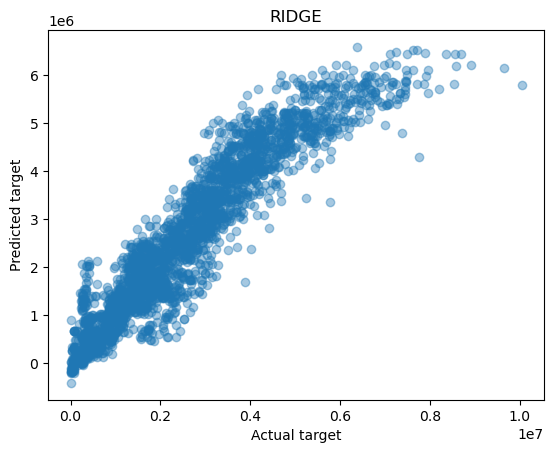

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.89
사용한 특성의 개수 :  502
0.8851077382985044


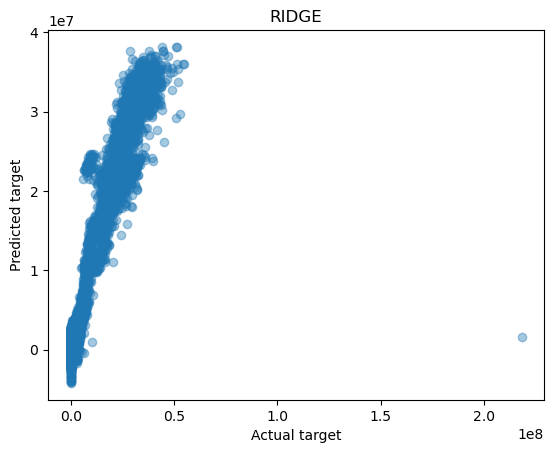

훈련 세트 점수 : 0.94
테스트 세트 점수 : 0.90
사용한 특성의 개수 :  616
0.9007422841236894


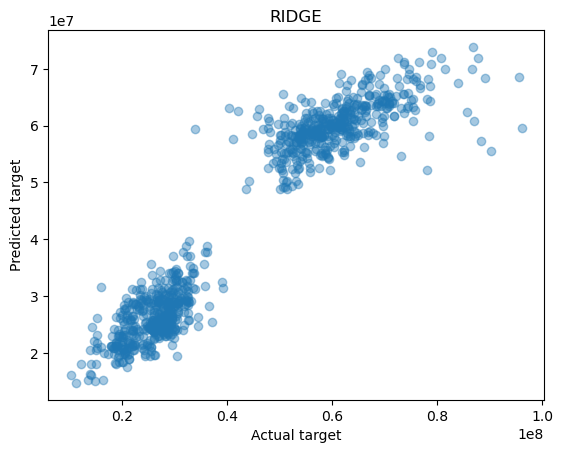

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.91
사용한 특성의 개수 :  248
0.908807246095627


In [22]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int','총인구수':'int','남자인구수':'int','여자인구수':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)

    ridge=Ridge()
    ridge.fit(x_train, y_train) 

    y_pred = ridge.predict(x_test)

    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("RIDGE")
    plt.show()

    print('훈련 세트 점수 : {:.2f}'.format(ridge.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(ridge.score(x_test, y_test)))
    print('사용한 특성의 개수 : ', np.sum(ridge.coef_ != 0))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

In [34]:
df_seoul.describe()

disMonth   disQuantity     sin_Month
count  32964.000000  3.296400e+04  3.296400e+04
mean       6.394461  1.070375e+07 -4.871220e-03
std        3.379270  1.536729e+07  7.147286e-01
min        1.000000  4.000000e+02 -1.000000e+00
25%        3.000000  5.955350e+06 -8.660254e-01
50%        6.000000  1.057805e+07  1.224647e-16
75%        9.000000  1.514560e+07  5.000000e-01
max       12.000000  2.586318e+09  1.000000e+00

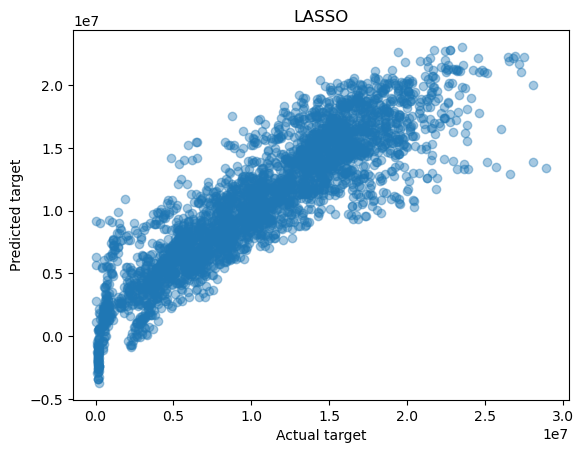

훈련 세트 점수 : 0.11
테스트 세트 점수 : 0.80
사용한 특성의 개수 :  34
0.8003820742575269


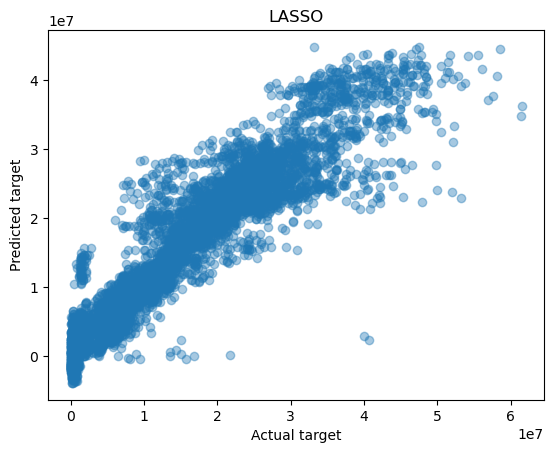

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  52
0.8717648670035042


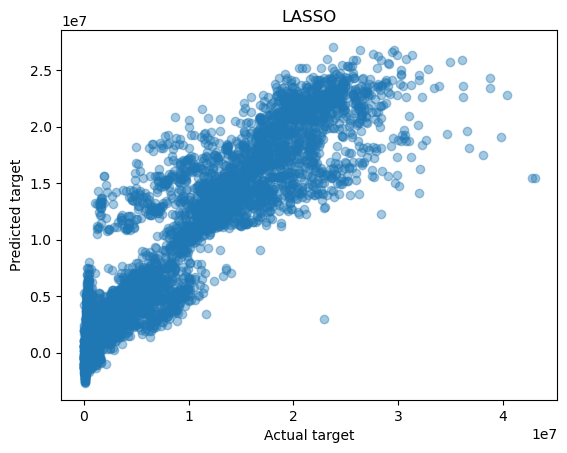

훈련 세트 점수 : 0.82
테스트 세트 점수 : 0.82
사용한 특성의 개수 :  42
0.8213890084727825


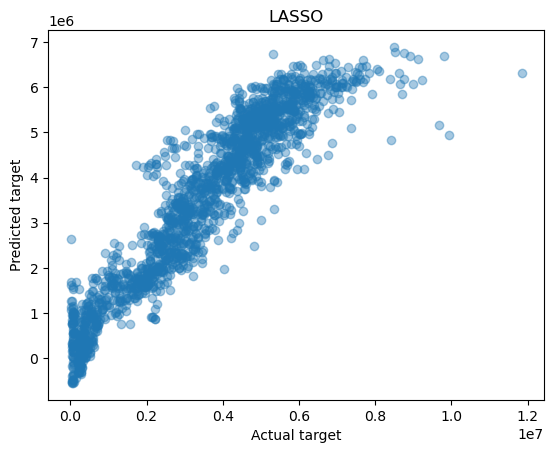

훈련 세트 점수 : 0.88
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  28
0.8736587222002496


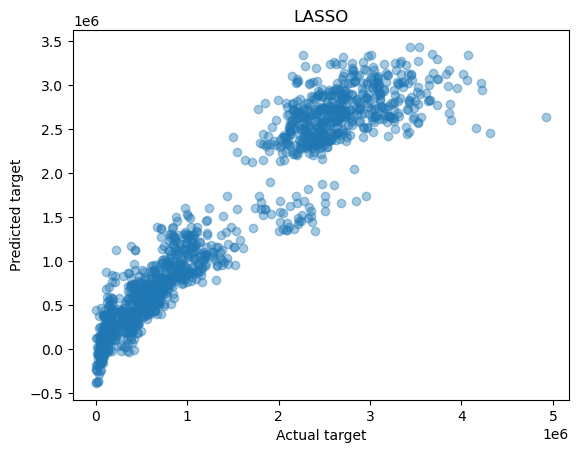

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.91
사용한 특성의 개수 :  25
0.9105091110113435


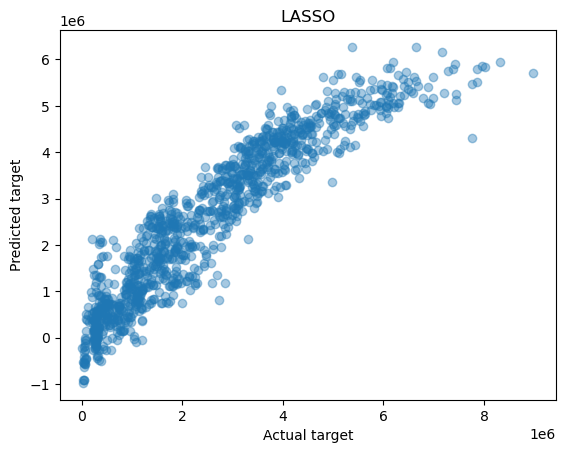

훈련 세트 점수 : 0.86
테스트 세트 점수 : 0.87
사용한 특성의 개수 :  24
0.8734104752598641


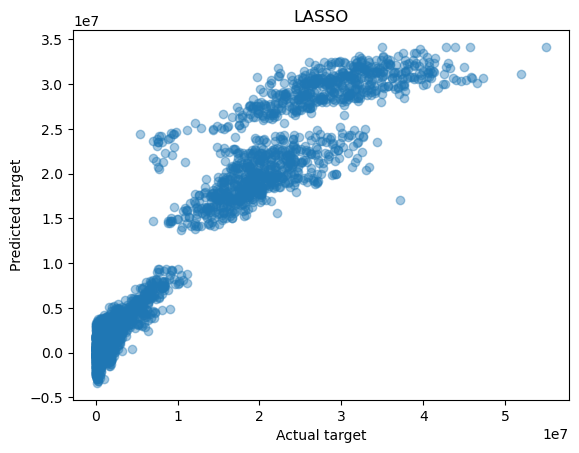

훈련 세트 점수 : 0.91
테스트 세트 점수 : 0.92
사용한 특성의 개수 :  37
0.923496801511371


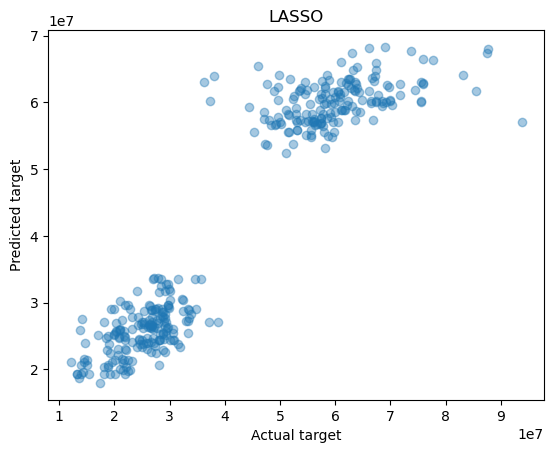

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.88
사용한 특성의 개수 :  17
0.880204678262012


In [65]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int','총인구수':'int','남자인구수':'int','여자인구수':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    lasso = Lasso()
    lasso.fit(x_train, y_train) 

    y_pred = lasso.predict(x_test)

    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("LASSO")
    plt.show()

    print('훈련 세트 점수 : {:.2f}'.format(lasso.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(lasso.score(x_test, y_test)))
    print('사용한 특성의 개수 : ', np.sum(lasso.coef_ != 0))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

In [32]:
df_seoul['이상치여부'].value_counts()

False    32949
True        15
Name: 이상치여부, dtype: int64

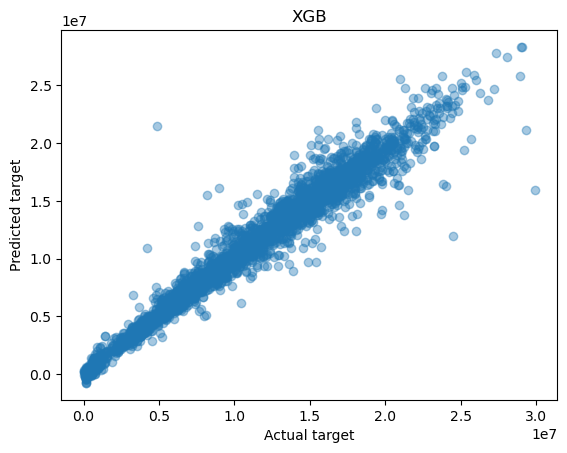

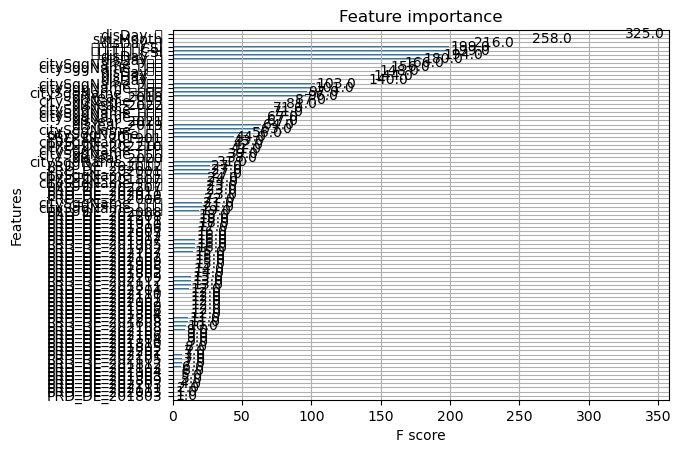

훈련 세트 점수 : 0.31
테스트 세트 점수 : 0.96
0.9595636346960673


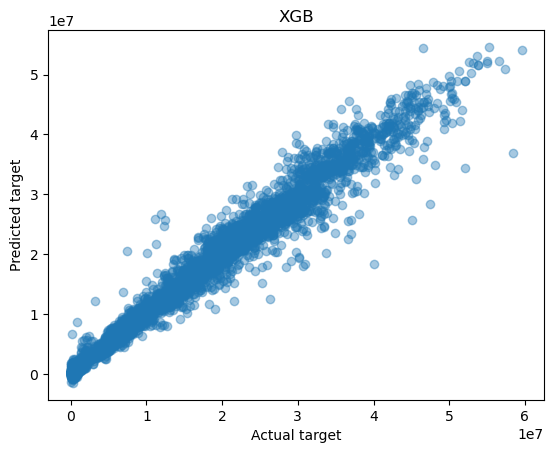

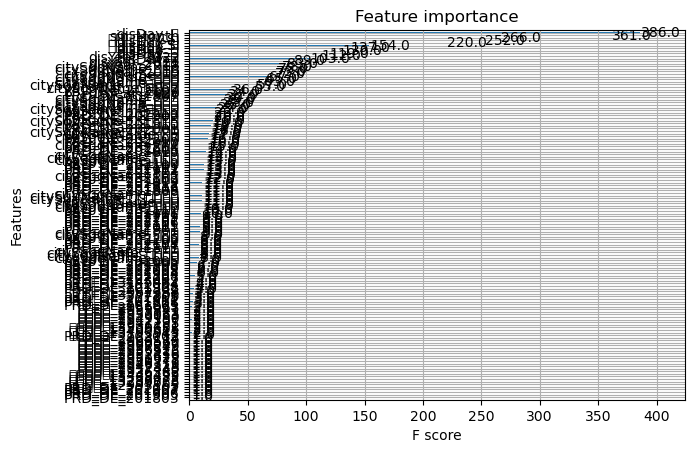

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.97
0.9726267861330409


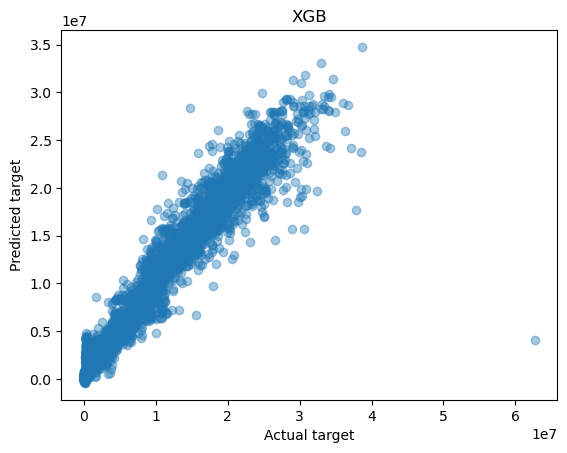

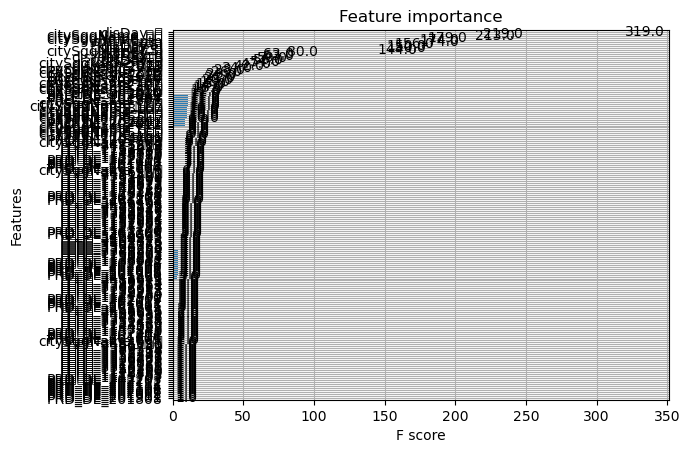

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.94
0.9428693139079307


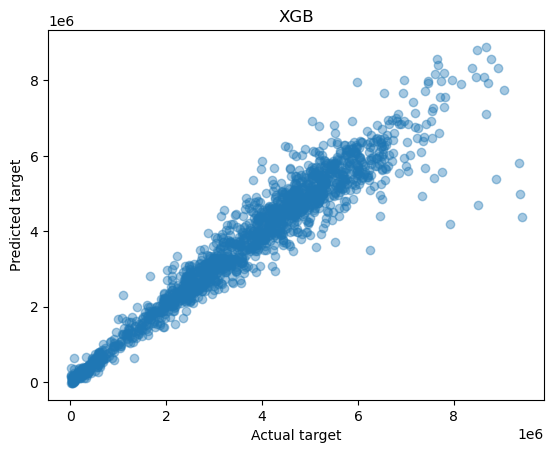

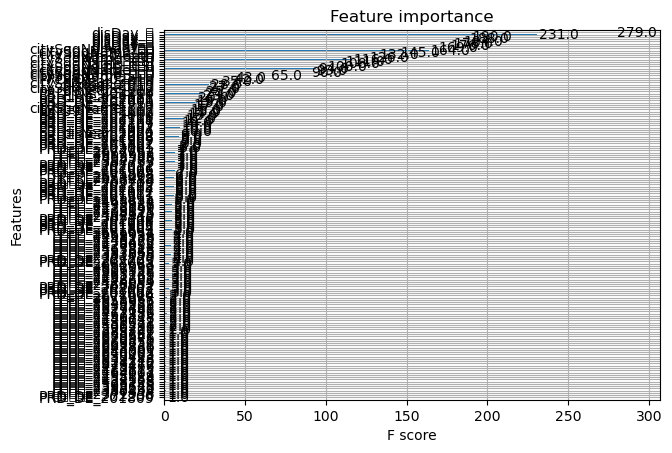

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.94
0.9395903068939501


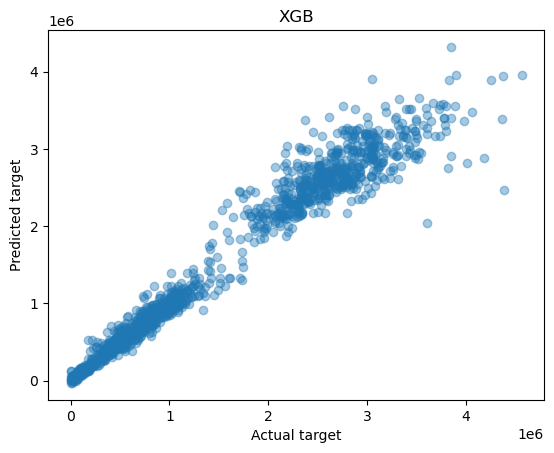

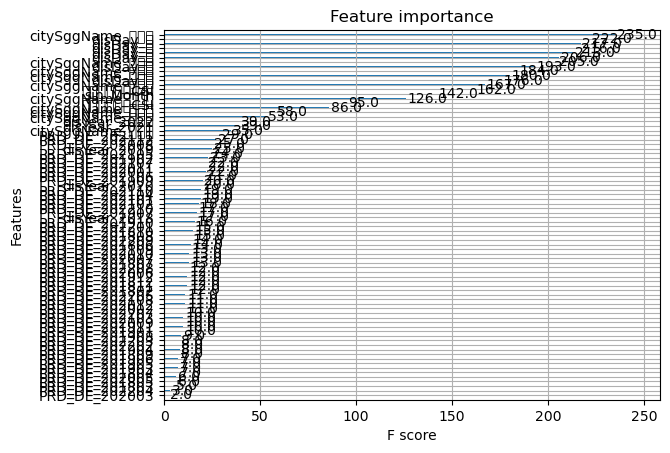

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.96
0.9615969770969097


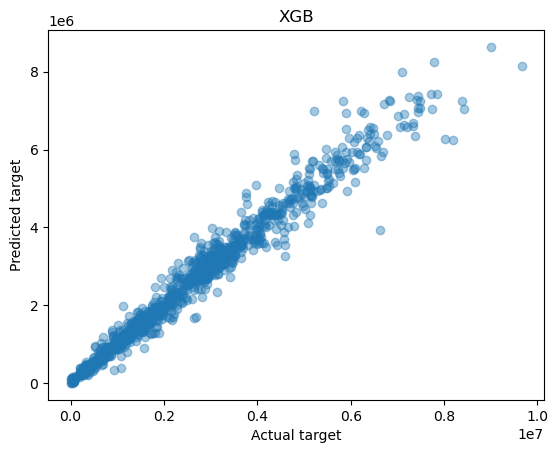

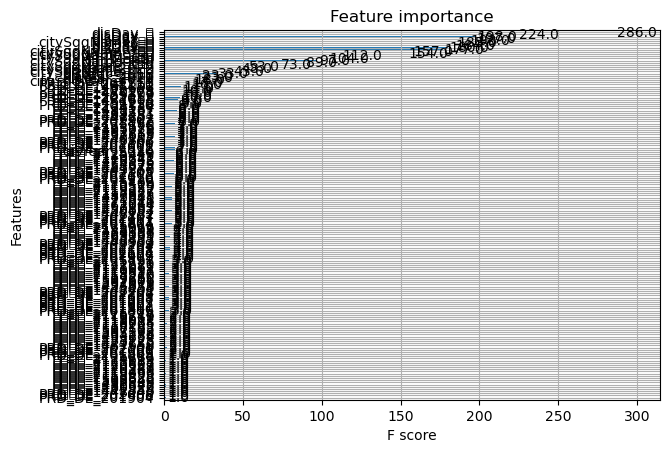

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.97
0.971816850473224


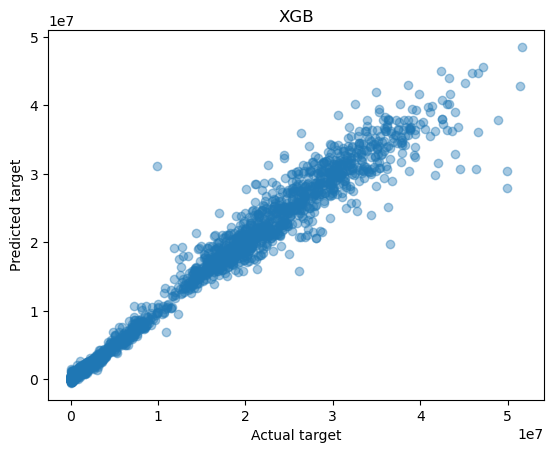

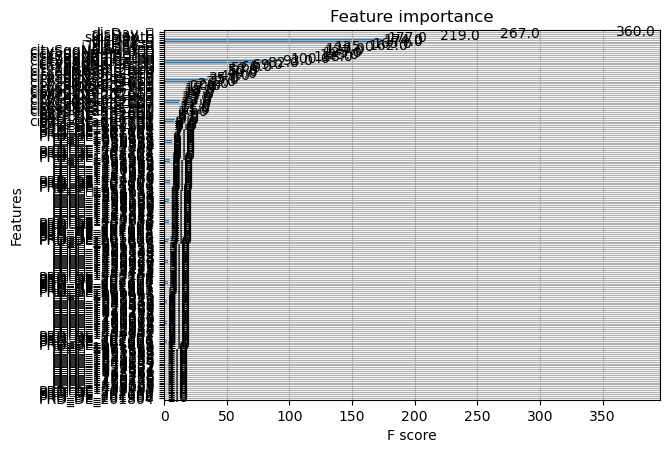

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.98
0.9784168887278104


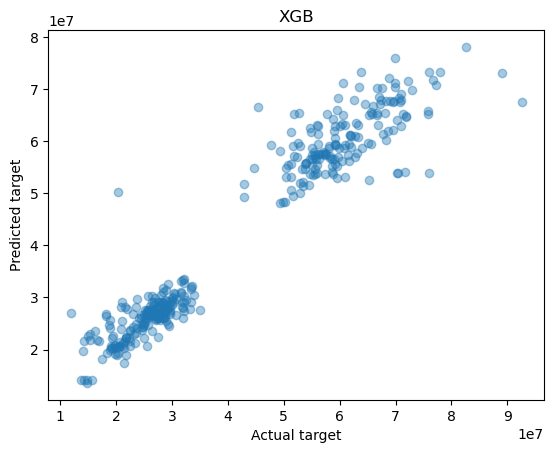

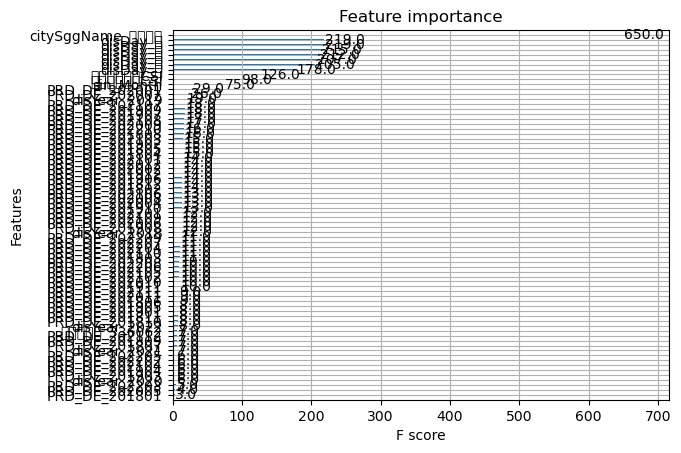

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.93
0.9301384809844664


In [24]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int','총인구수':'int','남자인구수':'int','여자인구수':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(x_train,y_train)
    
    y_pred = xgb_model.predict(x_test)
    
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("XGB")
    plt.show()
    xgb.plot_importance(xgb_model)

    plt.show()
    
    print('훈련 세트 점수 : {:.2f}'.format(xgb_model.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(xgb_model.score(x_test, y_test)))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

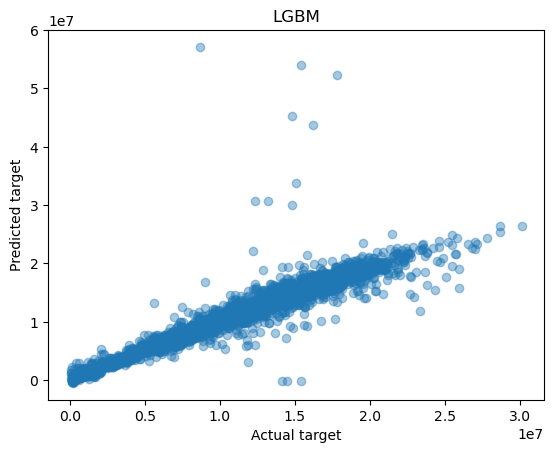

훈련 세트 점수 : 0.27
테스트 세트 점수 : 0.88
0.8751236730207543


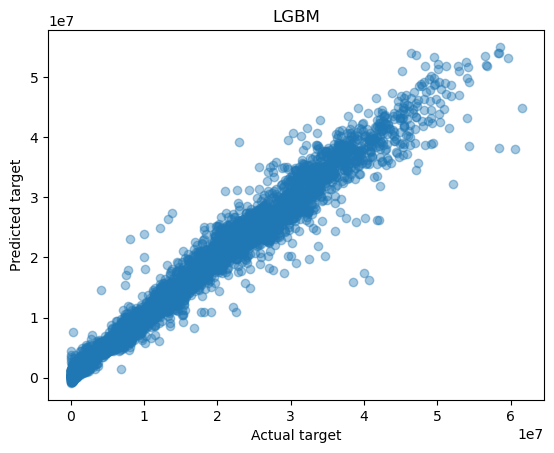

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.97
0.9702587730369996


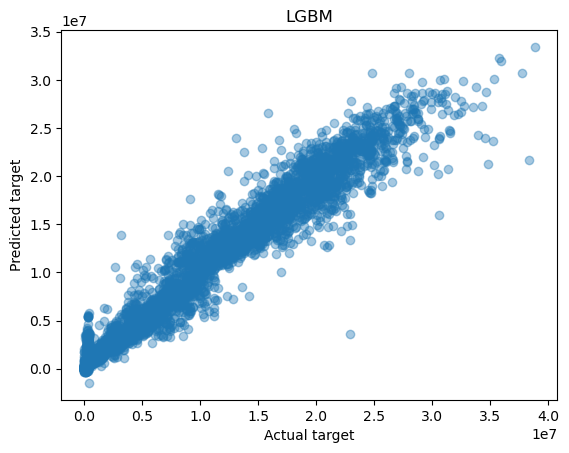

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.95
0.949926368986586


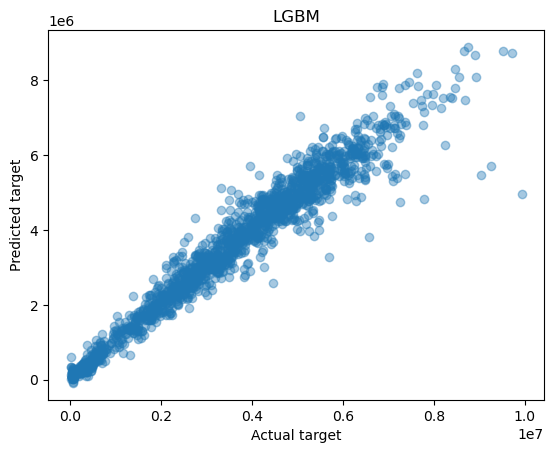

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.95
0.9493744106131713


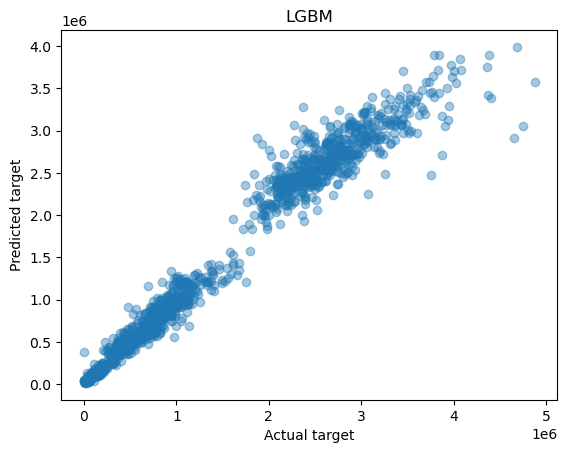

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.97
0.9668237911578035


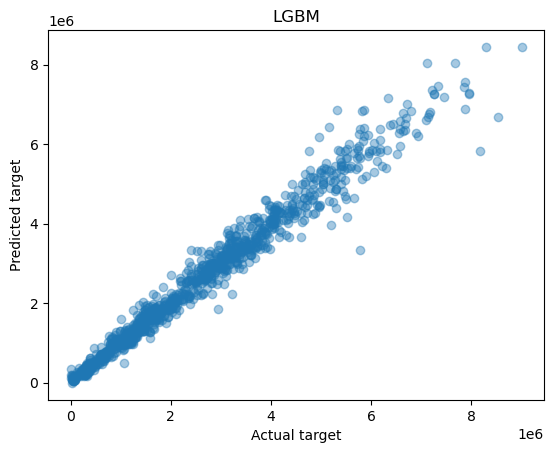

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.97
0.9746542399695352


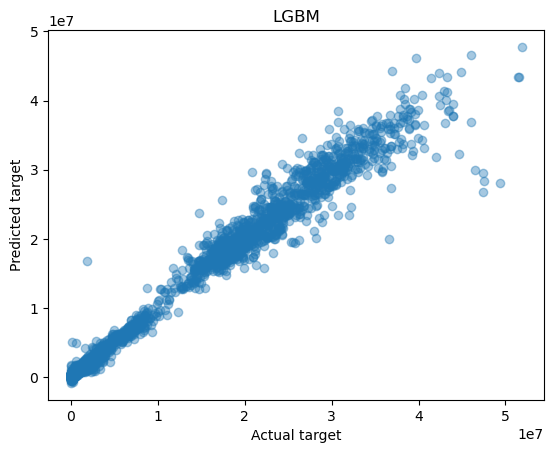

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.98
0.9791077932067268


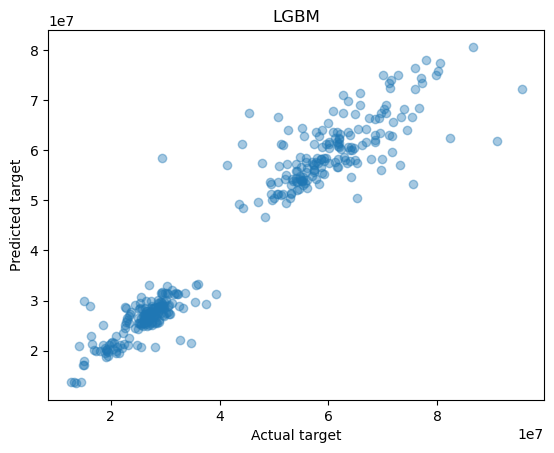

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.92
0.923818055000146


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    lgbm=LGBMRegressor()
    lgbm.fit(x_train, y_train)
    
    y_pred = lgbm.predict(x_test)
    
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("LGBM")
    plt.show()
    
    print('훈련 세트 점수 : {:.2f}'.format(lgbm.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(lgbm.score(x_test, y_test)))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)

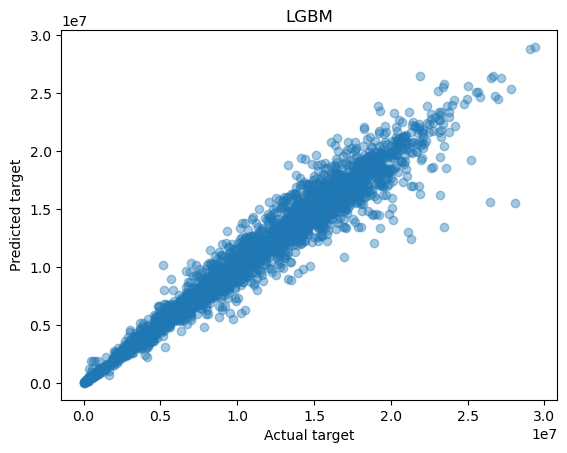

훈련 세트 점수 : 0.31
테스트 세트 점수 : 0.96
0.9580834170859883


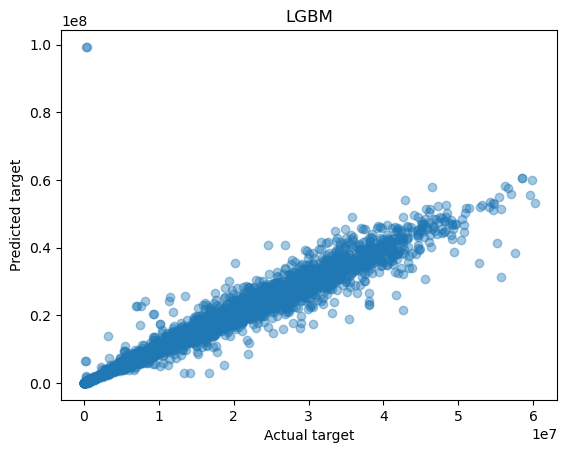

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.94
0.9439845169302177


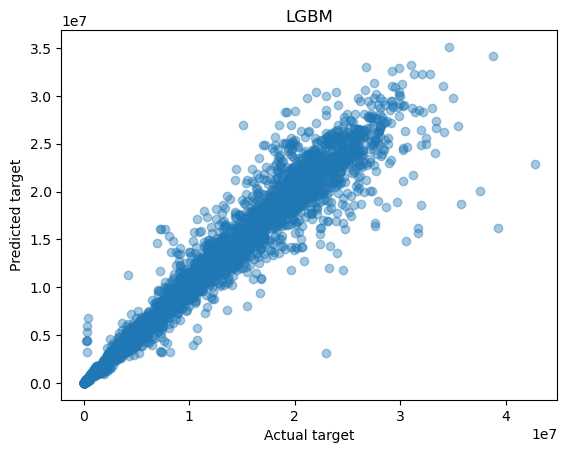

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.95
0.951726398146263


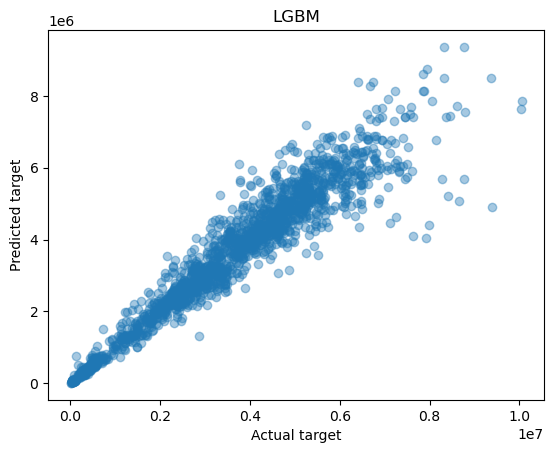

훈련 세트 점수 : 0.96
테스트 세트 점수 : 0.92
0.9227624753314495


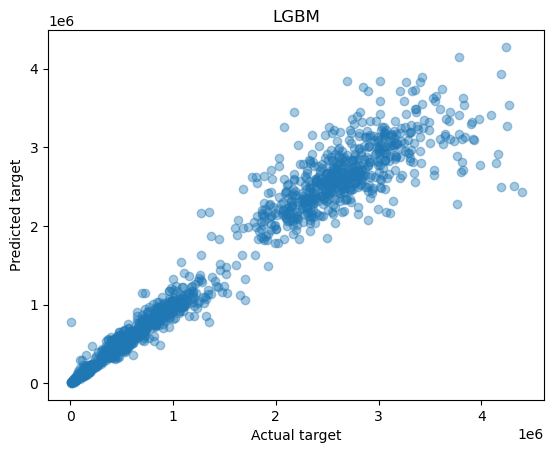

훈련 세트 점수 : 0.97
테스트 세트 점수 : 0.95
0.9470386609902416


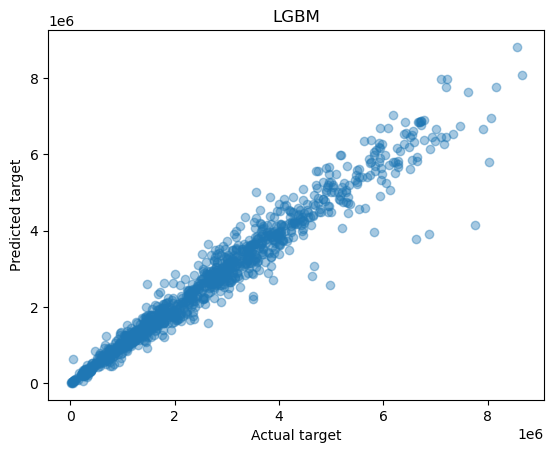

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.96
0.9575375462780005


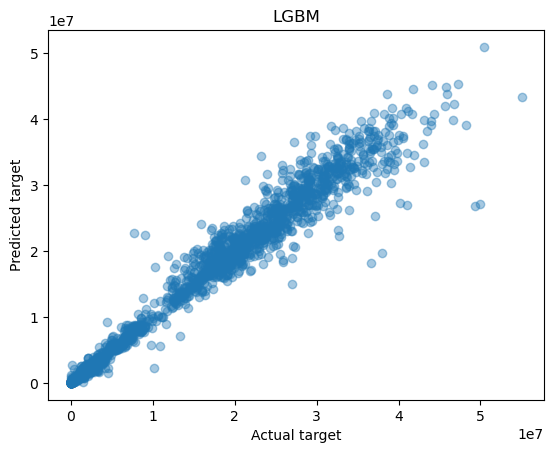

훈련 세트 점수 : 0.98
테스트 세트 점수 : 0.98
0.9761493937791819


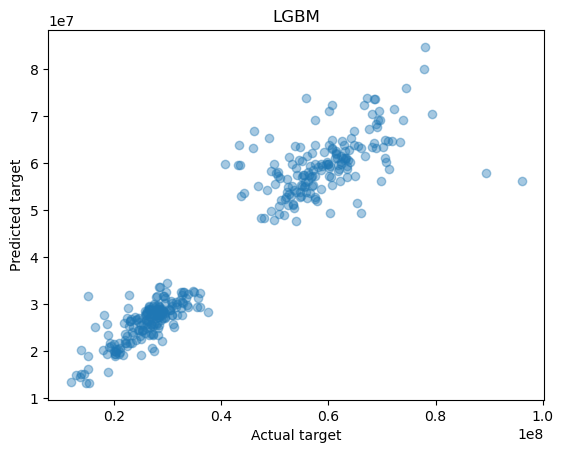

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.90
0.9032521135269967


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

for df in df_area:
    df_t=df.drop(['disQuantityRate','disCount','disMonth','disDate','disCountRate','이상치여부','cityCode','citySidoName'],axis=1)
    df_t=df_t.astype({'가계수입전망CSI':'int','소비지출전망CSI':'int'})
    
    df_test=pd.get_dummies(df_t)

    df_test['target']=df_test['disQuantity']
    df_test.drop('disQuantity',axis=1,inplace=True)
    
    x_data=df_test.drop('target',axis=1)
    y_data=df_test['target']


    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    
    y_pred = dt.predict(x_test)
    
    plt.scatter(y_test, y_pred, alpha=0.4)
    plt.xlabel("Actual target")
    plt.ylabel("Predicted target")
    plt.title("LGBM")
    plt.show()
    
    print('훈련 세트 점수 : {:.2f}'.format(dt.score(x_train, y_train)))
    print('테스트 세트 점수 : {:.2f}'.format(dt.score(x_test, y_test)))
    
    R2 = r2_score(y_test, y_pred)
    print(R2)